# Project : Predicting Spotify Track Popularity Using Machine Learning Models 
### Course: Introduction to Machine Learning
------------------------------------

### Team Name: Ctrl C-Ctrl V
### Name and ID of Member 1: Janojit Chakraborty - B2430050
### Name and ID of Member 2: Supriya Dutta - B2430064
----------------------------------

| **SL No** | **Task**                        | **Status**       |
|-----------|---------------------------------|------------------|
| 1         | Load Dataset                   | ✅ **Completed** |
| 2         | Exploratory Data Analysis (EDA) | ✅ **Completed** |
| 3         | Data Preprocessing             | ✅ **Completed** |
| 4         | Model Training                 | ✅ **Completed** |
| 5         | Model Evaluation and Conclusion | ✅ **Completed** |

---

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor, BaggingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.utils import check_array
from sklearn.utils.validation import check_is_fitted

## Load the Dataset
-------------------
**Source of the Dataset:** <https://www.kaggle.com/datasets/durjoychandrapaul/house-price-bangladesh>

----------------------

In [2]:
dataset = load_dataset("maharshipandya/spotify-tracks-dataset",split="train")

Using custom data configuration maharshipandya--spotify-tracks-dataset-fc2934c14bfbd9be
Reusing dataset csv (C:\Users\janoj\.cache\huggingface\datasets\maharshipandya___csv\maharshipandya--spotify-tracks-dataset-fc2934c14bfbd9be\0.0.0\652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)


In [3]:
df = dataset.to_pandas()

In [4]:
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
df = df.drop(["Unnamed: 0"],axis=1)

In [6]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [8]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


-------------------------
## Exploratory Data Analysis (EDA)
-------------------------

=== Genre Distribution ===

Top 10 Genres:
indie             1000
afrobeat          1000
minimal-techno    1000
black-metal       1000
malay             1000
grindcore         1000
salsa             1000
gospel            1000
rock              1000
j-rock            1000
Name: track_genre, dtype: int64


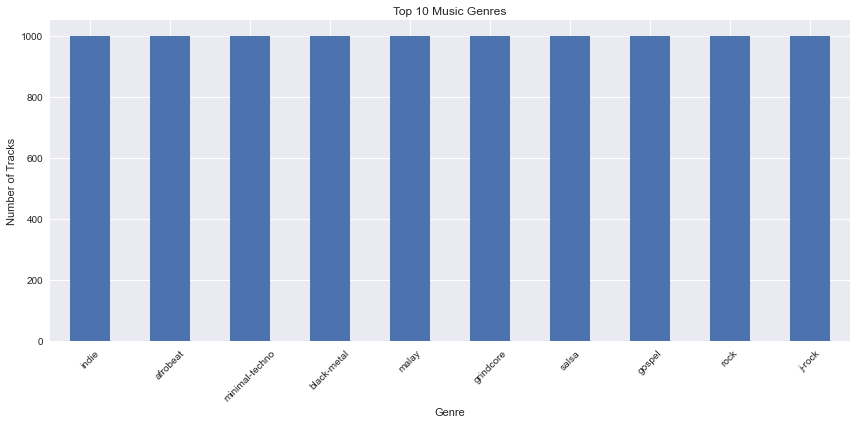


=== Popularity Analysis ===


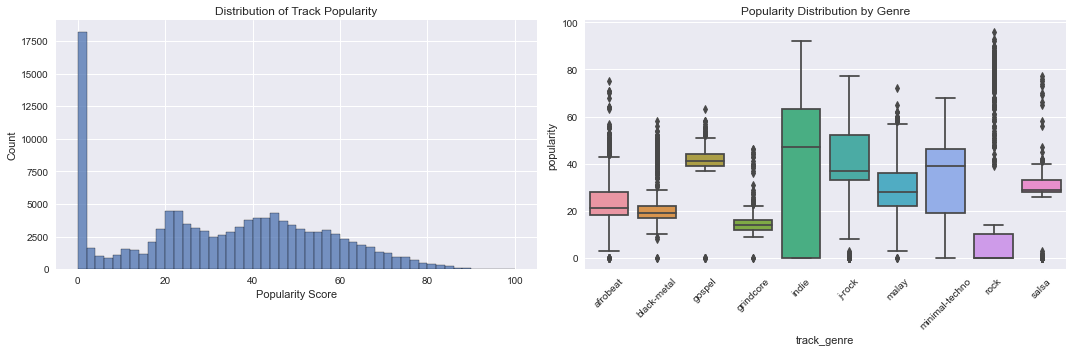

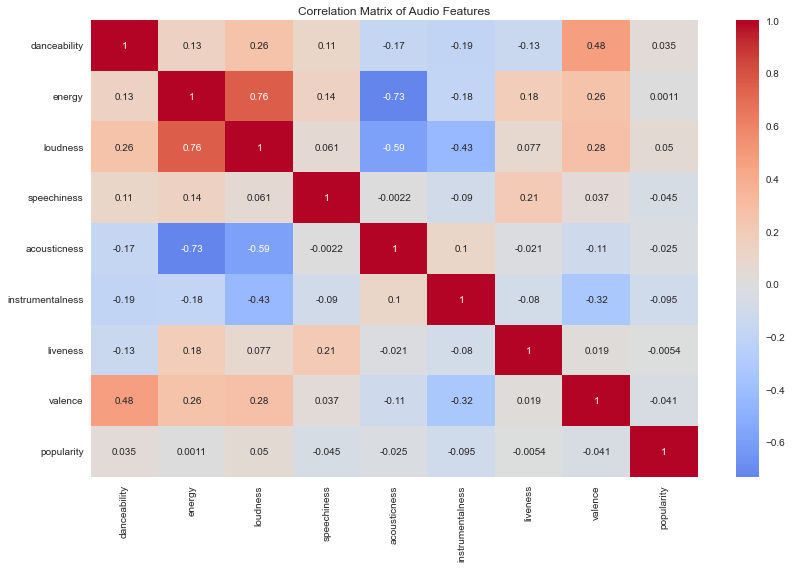


=== Explicit Content Analysis ===

Explicit vs Non-Explicit Tracks:
False    104253
True       9747
Name: explicit, dtype: int64

Genres with Highest Proportion of Explicit Tracks:
track_genre
comedy      0.656
emo         0.465
sad         0.450
j-dance     0.391
hardcore    0.325
Name: explicit, dtype: float64

=== Duration Analysis ===

Duration Statistics (in minutes):
count    114000.000000
mean          3.800486
std           1.788295
min           0.000000
25%           2.901100
50%           3.548433
75%           4.358433
max          87.288250
Name: duration_min, dtype: float64


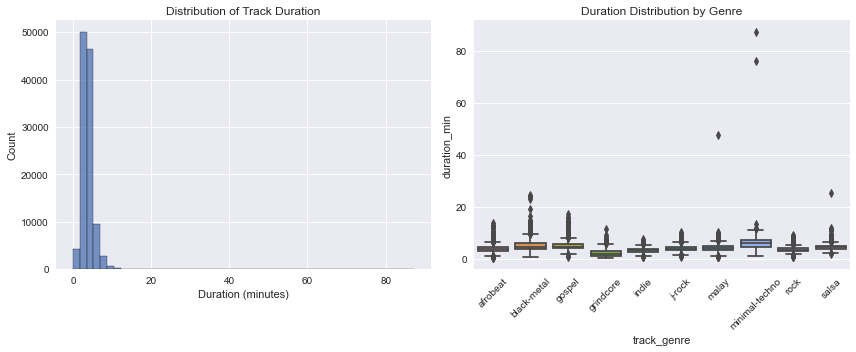


=== Musical Properties Analysis ===

Key Distribution:
0     13061
1     10772
2     11644
3      3570
4      9008
5      9368
6      7921
7     13245
8      7360
9     11313
10     7456
11     9282
Name: key, dtype: int64

Mode Distribution (0 = minor, 1 = major):
1    72681
0    41319
Name: mode, dtype: int64


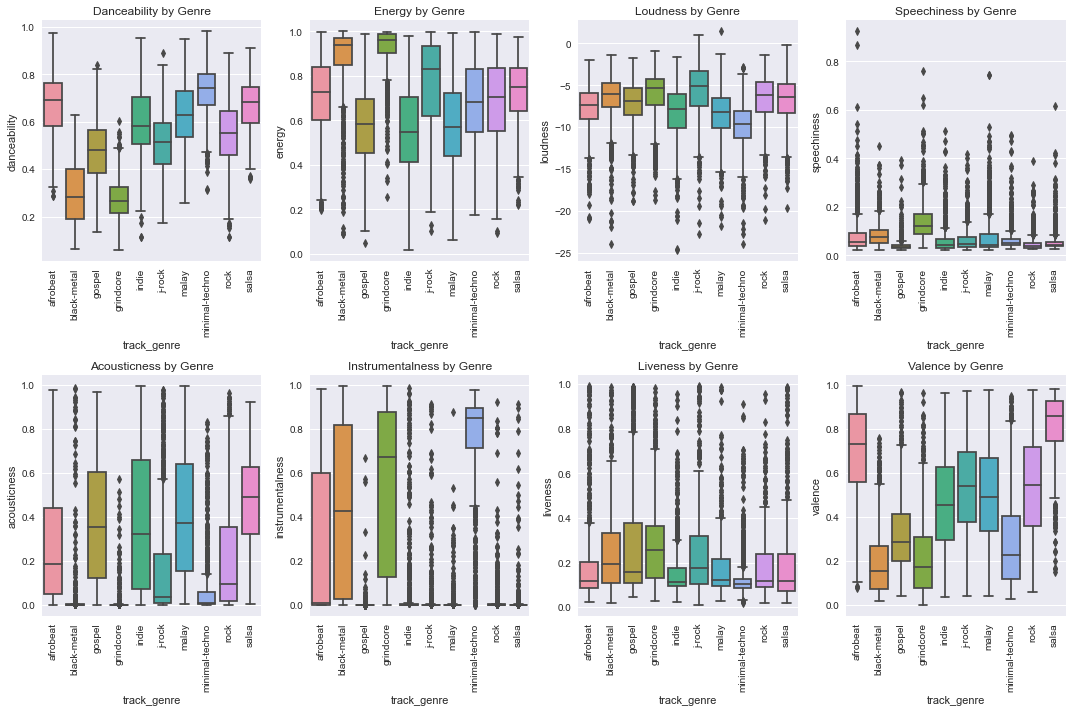


=== Key Insights ===
Total number of tracks: 114000
Number of unique artists: 31437
Number of unique albums: 46589
Average popularity score: 33.24
Percentage of explicit tracks: 8.55%
Most common genre: indie
Average track duration: 3.80 minutes


In [9]:
def analyze_spotify_dataset(df):
    # Set style for better visualizations
    plt.style.use('seaborn')
    
    # 1. Genre Analysis
    print("=== Genre Distribution ===")
    genre_counts = df['track_genre'].value_counts()
    print("\nTop 10 Genres:")
    print(genre_counts.head(10))
    
    plt.figure(figsize=(12, 6))
    genre_counts.head(10).plot(kind='bar')
    plt.title('Top 10 Music Genres')
    plt.xlabel('Genre')
    plt.ylabel('Number of Tracks')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # 2. Popularity Analysis
    print("\n=== Popularity Analysis ===")
    plt.figure(figsize=(15, 5))
    
    # Popularity distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df['popularity'], bins=50)
    plt.title('Distribution of Track Popularity')
    plt.xlabel('Popularity Score')
    
    # Popularity by genre (top 10 genres)
    plt.subplot(1, 2, 2)
    top_genres = genre_counts.head(10).index
    sns.boxplot(data=df[df['track_genre'].isin(top_genres)], 
                x='track_genre', y='popularity')
    plt.xticks(rotation=45)
    plt.title('Popularity Distribution by Genre')
    plt.tight_layout()
    plt.show()
    
    # 3. Audio Features Analysis
    audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                     'acousticness', 'instrumentalness', 'liveness', 'valence']
    
    # Correlation matrix for audio features
    plt.figure(figsize=(12, 8))
    correlation = df[audio_features + ['popularity']].corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Audio Features')
    plt.tight_layout()
    plt.show()
    
    # 4. Explicit Content Analysis
    print("\n=== Explicit Content Analysis ===")
    explicit_counts = df['explicit'].value_counts()
    print("\nExplicit vs Non-Explicit Tracks:")
    print(explicit_counts)
    
    # Explicit content by genre
    explicit_by_genre = df.groupby('track_genre')['explicit'].mean().sort_values(ascending=False)
    print("\nGenres with Highest Proportion of Explicit Tracks:")
    print(explicit_by_genre.head())
    
    # 5. Duration Analysis
    df['duration_min'] = df['duration_ms'] / (1000 * 60)
    
    print("\n=== Duration Analysis ===")
    print("\nDuration Statistics (in minutes):")
    print(df['duration_min'].describe())
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['duration_min'], bins=50)
    plt.title('Distribution of Track Duration')
    plt.xlabel('Duration (minutes)')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df[df['track_genre'].isin(top_genres)], 
                x='track_genre', y='duration_min')
    plt.xticks(rotation=45)
    plt.title('Duration Distribution by Genre')
    plt.tight_layout()
    plt.show()
    
    # 6. Key and Mode Analysis
    print("\n=== Musical Properties Analysis ===")
    key_counts = df['key'].value_counts().sort_index()
    mode_counts = df['mode'].value_counts()
    
    print("\nKey Distribution:")
    print(key_counts)
    print("\nMode Distribution (0 = minor, 1 = major):")
    print(mode_counts)
    
    # 7. Advanced Audio Feature Analysis by Genre
    plt.figure(figsize=(15, 10))
    for i, feature in enumerate(audio_features, 1):
        plt.subplot(2, 4, i)
        sns.boxplot(data=df[df['track_genre'].isin(top_genres)], 
                   x='track_genre', y=feature)
        plt.xticks(rotation=90)
        plt.title(f'{feature.capitalize()} by Genre')
    plt.tight_layout()
    plt.show()
    
    # 8. Key Insights Summary
    print("\n=== Key Insights ===")
    print(f"Total number of tracks: {len(df)}")
    print(f"Number of unique artists: {df['artists'].nunique()}")
    print(f"Number of unique albums: {df['album_name'].nunique()}")
    print(f"Average popularity score: {df['popularity'].mean():.2f}")
    print(f"Percentage of explicit tracks: {(df['explicit'].mean() * 100):.2f}%")
    print(f"Most common genre: {genre_counts.index[0]}")
    print(f"Average track duration: {df['duration_min'].mean():.2f} minutes")

    
analyze_spotify_dataset(df)

-----------------------------
## Data Preprocessing
-----------------------------

In [10]:
df = df.drop_duplicates()

In [11]:
df['explicit'] = df['explicit'].astype(int)

### Handling Missing Value

In [12]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
dtype: int64

In [13]:
df = df.dropna().reset_index(drop=True)

**Explanation**
As there are very few null values so, we decided to remove it.

In [14]:
df.isnull().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
duration_min        0
dtype: int64

In [15]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_min
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,3.844433
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,2.493500
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,3.513767
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,3.365550
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,3.314217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113544,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,0,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,6.416650
113545,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,0,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,6.416667
113546,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,0,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,4.524433
113547,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,0,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,4.731550


### **Why we didn't remove outliers for Spotify Tracks Dataset?**

Removing outliers in the **Spotify Tracks Dataset** may harm the model for the following reasons:

1. **Real-world Data**: Outliers may represent rare, but valid, tracks with unique features (e.g., high danceability or energy) that are important for understanding music trends.
2. **Loss of Information**: Extreme tracks can provide valuable insights and help the model generalize better to niche or viral tracks.
3. **Model Robustness**: Tree-based models (e.g., Random Forest) are generally less sensitive to outliers, so removing them may reduce the model's ability to handle real-world diversity.
   
Outlier removal may eliminate valuable data points and reduce the model’s ability to generalize to new, unusual tracks. Instead, consider using robust models or transformations to handle outliers.

### Feature Selection

## Selecting Categorical Features Based on Cardinality Ratio

To decide whether to include a categorical feature in a machine learning model, calculate the **cardinality ratio**:

$$
\text{Ratio} = \frac{\text{Number of Unique Values in the Feature}}{\text{Total Number of Instances}}
$$

### Guidelines:
- **If the ratio is too high**:
  - The feature has too many unique values relative to the dataset size.
  - It may lead to overfitting or increased computational complexity.
  - Consider ignoring the feature or applying transformations (e.g., binning, target encoding).

- **If the ratio is low**:
  - The feature is manageable and can be directly used for training.

This rule simplifies the decision-making process for handling categorical features in machine learning models.


In [16]:
categorical_features = ['artists', 'album_name', 'track_name', 'track_genre']

# Calculate the cardinality ratio for each feature
ratios = {}
for feature in categorical_features:
    unique_values = df[feature].nunique()
    total_instances = len(df)
    ratio = unique_values / total_instances
    ratios[feature] = ratio

# Display the ratios
print("Cardinality Ratios:")
for feature, ratio in ratios.items():
    print(f"{feature}: {ratio:.2f}")

# Conclusion based on the ratio
print("\nConclusion:")
for feature, ratio in ratios.items():
    if ratio > 0.2:  # Threshold for high cardinality
        print(f"Feature '{feature}' has a high cardinality ratio ({ratio:.2f}). Consider ignoring or transforming it.")
    else:
        print(f"Feature '{feature}' has a low cardinality ratio ({ratio:.2f}). It can be used for training.")

Cardinality Ratios:
artists: 0.28
album_name: 0.41
track_name: 0.65
track_genre: 0.00

Conclusion:
Feature 'artists' has a high cardinality ratio (0.28). Consider ignoring or transforming it.
Feature 'album_name' has a high cardinality ratio (0.41). Consider ignoring or transforming it.
Feature 'track_name' has a high cardinality ratio (0.65). Consider ignoring or transforming it.
Feature 'track_genre' has a low cardinality ratio (0.00). It can be used for training.


### Encoding

In [17]:
len(df['track_genre'].unique())

114

### Why We Are Not Using Label Encoding or One-Hot Encoding for `track_genre` 

#### Problem Context:
The feature `track_genre` is categorical and non-ordinal, meaning the genres do not have a natural order or hierarchy.

---

###  **Limitations of Label Encoding**  
   - **What it Does**: Label Encoding assigns a unique integer to each category, such as Rock = 0, Pop = 1, Jazz = 2, etc.
   - **Why It’s Inappropriate for `track_genre`:**
     - **Artificial Ordinality**: The numerical encoding creates an implied order among the genres (e.g., Jazz > Pop > Rock), which is incorrect since genres are categorical and do not have any inherent ranking.
     - **Model Misinterpretation**: Models like regression or tree-based methods may misinterpret the numeric labels as meaningful distances or hierarchies, leading to biased predictions.

---

### **Limitations of One-Hot Encoding**  
   - **What it Does**: One-Hot Encoding converts each category into a separate binary column. For instance, the dataset with 114 unique genres results in 114 additional features.
   - **Why It’s Inappropriate for `track_genre`:**
     - **Curse of Dimensionality**: Adding too many features significantly increases the dataset’s dimensionality, which:
       - Makes training computationally expensive.
       - Increases the risk of overfitting, especially if the dataset does not have enough samples relative to the number of features.
     - **Sparse Data**: The resulting matrix is sparse (mostly filled with zeros), which can be inefficient for both memory usage and computation.

---

### Why Target Encoding is More Suitable
   - **What it Does**: Target Encoding replaces each category with a statistic of the target variable (e.g., mean popularity) for that category. For example:
     - If Rock tracks have an average popularity of 70, Pop tracks 80, and Jazz tracks 60, these values will replace the respective genres.
   - **Advantages Over Label and One-Hot Encoding**:
     - **Captures Relationships**: Target encoding reflects the relationship between `track_genre` and the target variable (`popularity`) instead of assigning arbitrary or binary values.
     - **Maintains Dataset Size**: Unlike one-hot encoding, target encoding keeps `track_genre` as a single column, reducing feature space and avoiding sparsity.
     - **No Imposed Ordinality**: It does not impose an artificial order on the categories, making it appropriate for non-ordinal features.

---

### Considerations for Target Encoding
   - **Check Correlation**: Before applying target encoding, evaluate the correlation between `track_genre` and `popularity` to ensure it captures meaningful information.

---

We are not using label encoding or one-hot encoding for `track_genre` because:
1. Label encoding introduces artificial ordinal relationships.
2. One-hot encoding increases dimensionality, leading to computational inefficiency and a risk of overfitting.

Instead, target encoding is a better choice as it effectively captures the relationship between `track_genre` and `popularity` without increasing dimensionality or imposing order.

In [18]:
genre_means = df.groupby('track_genre')['popularity'].mean()
df['track_genre_encoded'] = df['track_genre'].map(genre_means)

In [19]:
correlation = df['track_genre_encoded'].corr(df['popularity'])
print(f"Correlation: {correlation}")

Correlation: 0.5020345001224197


---------------------------------
Since the correlation between `track_genre` and `popularity` is 0.5, which is significantly higher than 0.3, target encoding is well-suited for this problem. The strong correlation indicates that `track_genre` provides meaningful information about `popularity`, and target encoding effectively captures this relationship without increasing dimensionality or imposing artificial order.

-------------------------------
### Spliting the Dataset

In [20]:
X = df.drop(['popularity','track_id','artists','album_name','track_name','track_genre'],axis=1)
y = df['popularity']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [22]:
numerical_features = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 
                      'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                      'valence', 'tempo']

In [23]:
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [24]:
bounded_features = ['key', 'tempo']
min_max_scaler = MinMaxScaler()
X_train[bounded_features] = min_max_scaler.fit_transform(X_train[bounded_features])
X_test[bounded_features] = min_max_scaler.transform(X_test[bounded_features])

Scaling is necessary to ensure all numerical features contribute equally to the model. Some features may have a wide range of values (e.g., `duration_ms`) compared to others (e.g., `speechiness`).

1. **`StandardScaler` for features with Gaussian-like distributions**:
   - Features like `danceability`, `energy`, and `valence` are normalized to have zero mean and unit variance, which is ideal for algorithms like SVM or Logistic Regression.

2. **`MinMaxScaler` for features with bounded ranges**:
   - Features like `key` (bounded to 0–11) and `tempo` (bounded to realistic BPM values) benefit from scaling to [0, 1] to retain interpretability while normalizing.

In [25]:
X_train

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,track_genre_encoded
110090,-0.268535,0,1.371207,-0.435791,0.818182,0.516566,1,-0.459034,-0.862189,-0.316604,-0.056770,0.281930,0.597377,4,3.325617,37.636637
15917,-0.639862,0,2.276735,-1.503688,1.000000,-0.595522,0,-0.050429,0.636889,-0.474906,-0.565020,-0.593871,0.539148,4,2.666667,53.704705
101181,-1.115204,0,-0.416778,-2.305805,0.090909,-4.140377,1,-0.177530,1.736937,2.228651,-0.797138,-1.475846,0.494580,5,1.823133,35.071000
66950,-0.209967,1,0.886721,0.285437,1.000000,0.560922,0,1.403225,-0.622891,-0.503488,1.824279,0.123746,0.422282,4,3.429550,8.363636
22708,0.024577,0,-0.993547,1.030574,0.000000,0.538744,1,-0.431731,-0.945358,2.338584,-0.798186,-0.451119,0.406595,4,3.845767,32.179179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,3.942120,0,-0.295656,0.516549,0.545455,0.521361,0,-0.414784,0.401810,-0.503488,1.777122,0.378384,0.718978,4,10.797767,44.298000
110268,0.049878,0,-0.064948,0.847279,0.545455,-0.134383,1,-0.147402,-0.904082,0.540868,-0.062010,-1.622456,0.556991,4,3.890667,37.636637
103694,-0.155616,0,0.194598,-0.423837,0.000000,0.378504,1,-0.426082,0.787581,-0.503488,-0.234919,-0.481985,0.617030,3,3.526000,37.922000
860,-0.106018,0,-0.843587,-2.133268,0.545455,-1.388129,1,-0.484454,1.911739,-0.503488,-0.658810,-1.373219,0.468175,4,3.614017,42.483000


-----------------------------
## Model Training
-----------------------------

#### Define hyperparameter grids for each model

In [26]:
param_grids = {
    "Linear Regression": {},
    "Ridge": {"ridge__alpha": [0.1, 1.0, 10.0]},
    "Lasso": {"lasso__alpha": [0.01, 0.1, 1.0]},
    "Decision Tree": {"decisiontree__max_depth": [5, 10, 15], "decisiontree__min_samples_split": [2, 5, 10]},
    "Random Forest": {"randomforest__n_estimators": [50, 100, 200], "randomforest__max_depth": [10, 20, None]},
    "Gradient Boosting": {"gradientboosting__n_estimators": [50, 100, 200], "gradientboosting__learning_rate": [0.01, 0.1, 0.2]},
    "XGBoost": {"xgbregressor__n_estimators": [50, 100, 200], "xgbregressor__learning_rate": [0.01, 0.1, 0.2]},
    "KNN": {"kneighborsregressor__n_neighbors": [3, 5, 10]},
    "SVR": {"svr__C": [0.1, 1, 10], "svr__kernel": ["linear", "rbf"]}
}

#### Define pipelines for each model

In [27]:
pipelines = {
    "Linear Regression": Pipeline([("linear", LinearRegression())]),
    "Ridge": Pipeline([("ridge", Ridge())]),
    "Lasso": Pipeline([("lasso", Lasso())]),
    "Decision Tree": Pipeline([("decisiontree", DecisionTreeRegressor())]),
    "Random Forest": Pipeline([("randomforest", RandomForestRegressor())]),
    "Gradient Boosting": Pipeline([("gradientboosting", GradientBoostingRegressor())]),
    "XGBoost": Pipeline([("xgbregressor", xgb.XGBRegressor(objective='reg:squarederror'))]),
    "KNN": Pipeline([("kneighborsregressor", KNeighborsRegressor())]),
    "SVR": Pipeline([("svr", SVR())])
}

#### Train models and perform hyperparameter tuning

In [28]:
results = []
best_estimators = {}

for model_name, pipeline in pipelines.items():
    print(f"Training and tuning {model_name}...")
    
    # Create GridSearchCV object
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model
    best_estimators[model_name] = grid_search.best_estimator_
    
    # Evaluate the best model on training data
    y_train_pred = grid_search.best_estimator_.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Evaluate the best model on testing data
    y_test_pred = grid_search.best_estimator_.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Append results
    results.append({
        "Model": model_name,
        "Training MAE": train_mae,
        "Training MSE": train_mse,
        "Training R2": train_r2,
        "Testing MAE": test_mae,
        "Testing MSE": test_mse,
        "Testing R2": test_r2,
    })

Training and tuning Linear Regression...
Training and tuning Ridge...
Training and tuning Lasso...
Training and tuning Decision Tree...
Training and tuning Random Forest...
Training and tuning Gradient Boosting...
Training and tuning XGBoost...
Training and tuning KNN...
Training and tuning SVR...


### Ensemble Models

#### Model Architectures
<img src="ensemble.svg" alt="Description" style="width:500px;height:auto;">

#### Base Models

In [29]:
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror'),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "SVR": SVR(kernel='rbf'),
    "Decision Tree": DecisionTreeRegressor(max_depth=10)
}

#### 1. Voting Regressor

In [30]:
voting_ensemble = VotingRegressor(estimators=[ 
    ('rf', models["Random Forest"]), 
    ('xgb', models["XGBoost"]), 
    ('gb', models["Gradient Boosting"])
])
voting_ensemble.fit(X_train, y_train)
y_pred_voting_train = voting_ensemble.predict(X_train)
y_pred_voting = voting_ensemble.predict(X_test)

#### 2. Stacking Regressor

In [31]:
stacking_ensemble = StackingRegressor(estimators=[ 
    ('rf', models["Random Forest"]), 
    ('xgb', models["XGBoost"])
], final_estimator=Ridge())
stacking_ensemble.fit(X_train, y_train)
y_pred_stacking_train = stacking_ensemble.predict(X_train)
y_pred_stacking = stacking_ensemble.predict(X_test)

#### 3. Bagging Regressor

In [32]:
bagging_ensemble = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=50, random_state=42)
bagging_ensemble.fit(X_train, y_train)
y_pred_bagging_train = bagging_ensemble.predict(X_train)
y_pred_bagging = bagging_ensemble.predict(X_test)

#### 4. Gradient Boosting Regressor (Boosting)

In [33]:
gb_ensemble = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_ensemble.fit(X_train, y_train)
y_pred_gb_train = gb_ensemble.predict(X_train)
y_pred_gb = gb_ensemble.predict(X_test)

#### 5. AdaBoost Regressor

In [34]:
ada_ensemble = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3), n_estimators=50)
ada_ensemble.fit(X_train, y_train)
y_pred_ada_train = ada_ensemble.predict(X_train)
y_pred_ada = ada_ensemble.predict(X_test)

#### Evaluate all models

In [35]:
def evaluate_model(model_name, y_train, y_train_pred, y_test, y_test_pred):
    return {
        "Model": model_name,
        "Training MAE": mean_absolute_error(y_train, y_train_pred),
        "Testing MAE": mean_absolute_error(y_test, y_test_pred),
        "Training MSE": mean_squared_error(y_train, y_train_pred),
        "Testing MSE": mean_squared_error(y_test, y_test_pred),
        "Training R2": r2_score(y_train, y_train_pred),
        "Testing R2": r2_score(y_test, y_test_pred)
    }

results.append(evaluate_model("Voting Regressor", y_train, y_pred_voting_train, y_test, y_pred_voting))
results.append(evaluate_model("Stacking Regressor", y_train, y_pred_stacking_train, y_test, y_pred_stacking))
results.append(evaluate_model("Bagging Regressor", y_train, y_pred_bagging_train, y_test, y_pred_bagging))
results.append(evaluate_model("Gradient Boosting Regressor", y_train, y_pred_gb_train, y_test, y_pred_gb))
results.append(evaluate_model("AdaBoost Regressor", y_train, y_pred_ada_train, y_test, y_pred_ada))

### Multi-layer Neural Models
**Using Ensemble Techniques**

#### Model - 1 | Architecture
<img src="neural-ensemble-svg.svg" alt="Description" style="width:500px;height:auto;">

In [36]:
class NeuralEnsemble(BaseEstimator, RegressorMixin):
    def __init__(self, base_models, meta_model):
        """
        Initialize the NeuralEnsemble.
        
        Parameters:
        - base_models: list of base models (first layer)
        - meta_model: the model used for aggregation (second layer)
        """
        self.base_models = base_models
        self.meta_model = meta_model

    def fit(self, X, y):
        """
        Train the base models and meta-model.
        
        Parameters:
        - X: training features
        - y: training target
        """
        self.base_models_ = [clone(model) for model in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        
        # Train each base model
        self.base_model_predictions_ = []
        for model in self.base_models_:
            model.fit(X, y)
            predictions = model.predict(X)
            self.base_model_predictions_.append(predictions)
        
        # Use base model predictions as features for the meta-model
        meta_features = np.column_stack(self.base_model_predictions_)
        self.meta_model_.fit(meta_features, y)
        return self

    def predict(self, X):
        """
        Predict using the trained ensemble.
        
        Parameters:
        - X: input features
        
        Returns:
        - Predicted values
        """
        # Generate predictions from base models
        base_model_predictions = [model.predict(X) for model in self.base_models_]
        
        # Use these predictions as input to the meta-model
        meta_features = np.column_stack(base_model_predictions)
        return self.meta_model_.predict(meta_features)

# Define base models (first layer)
base_models = [
    RandomForestRegressor(n_estimators=100, random_state=42),
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    GradientBoostingRegressor(n_estimators=100, random_state=42)
]

# Define meta-model (second layer)
meta_model = Ridge(alpha=1.0)

# Create the neural ensemble
neural_ensemble = NeuralEnsemble(base_models=base_models, meta_model=meta_model)

# Train the ensemble
neural_ensemble.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = neural_ensemble.predict(X_train)
y_test_pred = neural_ensemble.predict(X_test)

# Evaluate performance
results.append(evaluate_model("Neural Ensemble", y_train, y_train_pred, y_test, y_test_pred))

#### Model - 2 | Architecture
<img src="neural-ensemble-cv-detailed.svg" alt="Description" style="width:500px;height:auto;">

In [37]:
class NeuralEnsembleCV(BaseEstimator, RegressorMixin):
    def __init__(self, base_models, meta_model, random_drop_rate=0.0):
        self.base_models = base_models
        self.meta_model = meta_model
        self.random_drop_rate = random_drop_rate

    def fit(self, X, y):
        # Convert X and y to numpy arrays
        X = check_array(X, ensure_2d=True)
        y = check_array(y, ensure_2d=False)

        self.base_models_ = [clone(model) for model in self.base_models]
        self.meta_model_ = clone(self.meta_model)

        # KFold for meta-model training
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        meta_features = np.zeros((len(y), len(self.base_models_)))

        # Train each base model and generate out-of-fold predictions
        for i, model in enumerate(self.base_models_):
            fold_predictions = np.zeros(len(y))
            for train_idx, val_idx in kf.split(X):
                X_train_fold, X_val_fold = X[train_idx], X[val_idx]
                y_train_fold, y_val_fold = y[train_idx], y[val_idx]
                model.fit(X_train_fold, y_train_fold)
                fold_predictions[val_idx] = model.predict(X_val_fold)
            meta_features[:, i] = fold_predictions

        # Standardize meta-features
        self.scaler_ = StandardScaler()
        meta_features = self.scaler_.fit_transform(meta_features)

        # Fit the meta-model
        self.meta_model_.fit(meta_features, y)
        return self

    def predict(self, X):
        # Convert X to numpy array
        X = check_array(X, ensure_2d=True)

        # Generate predictions from base models
        base_model_predictions = np.column_stack([model.predict(X) for model in self.base_models_])

        # Standardize meta-features
        meta_features = self.scaler_.transform(base_model_predictions)

        # Predict with meta-model
        return self.meta_model_.predict(meta_features)


# Define base models with regularization
base_models = [
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
]

# Use a regularized meta-model
meta_model = Ridge(alpha=1.0)

# Create the ensemble
neural_ensemble_cv = NeuralEnsembleCV(base_models=base_models, meta_model=meta_model, random_drop_rate=0.01)

# Train the ensemble
neural_ensemble_cv.fit(X_train, y_train)

# Predict and evaluate
y_train_pred = neural_ensemble_cv.predict(X_train)
y_test_pred = neural_ensemble_cv.predict(X_test)

# Evaluate performance
results.append(evaluate_model("Neural Ensemble with CV", y_train, y_train_pred, y_test, y_test_pred))

In [38]:
results

[{'Model': 'Linear Regression',
  'Training MAE': 14.069379745690178,
  'Training MSE': 367.56126375790166,
  'Training R2': 0.25790568045606754,
  'Testing MAE': 14.231874724790842,
  'Testing MSE': 375.70037959244536,
  'Testing R2': 0.2510166074815672},
 {'Model': 'Ridge',
  'Training MAE': 14.069460550659565,
  'Training MSE': 367.55998048057234,
  'Training R2': 0.2579082713515465,
  'Testing MAE': 14.232038930290669,
  'Testing MSE': 375.70009600009814,
  'Testing R2': 0.2510171728415451},
 {'Model': 'Lasso',
  'Training MAE': 14.067318006694142,
  'Training MSE': 367.5713046581134,
  'Training R2': 0.25788540820285444,
  'Testing MAE': 14.229998139761292,
  'Testing MSE': 375.72563473250733,
  'Testing R2': 0.2509662597004373},
 {'Model': 'Decision Tree',
  'Training MAE': 12.969242022386569,
  'Training MSE': 325.886767999181,
  'Training R2': 0.3420451413345521,
  'Testing MAE': 13.749764401256204,
  'Testing MSE': 368.2813756200151,
  'Testing R2': 0.2658068793743089},
 {'Mod

---------------------------
## Model Evaluation and Conclusion
---------------------------

To evaluate overfitting, underfitting, and the best model, we will analyze and visualize the data with key metrics like **MAE**, **MSE**, and **R²** for both training and testing datasets. Let's first plot the metrics and then discuss insights.

### Steps:
1. **Visualizations**:
   - Training and testing errors (MAE and MSE) for all models.
   - Comparison of R² values for training and testing.

2. **Criteria for Analysis**:
   - **Overfitting**: High training performance but poor testing performance (large gap in metrics between training and testing).
   - **Underfitting**: Poor performance on both training and testing datasets (low R², high MAE/MSE).
   - **Best Model**: Balanced performance with low errors (MAE/MSE) and high R² for both training and testing.

I'll plot the graphs and provide insights.

In [39]:
result_df = pd.DataFrame(results)

#### Plotting training vs. testing MAE

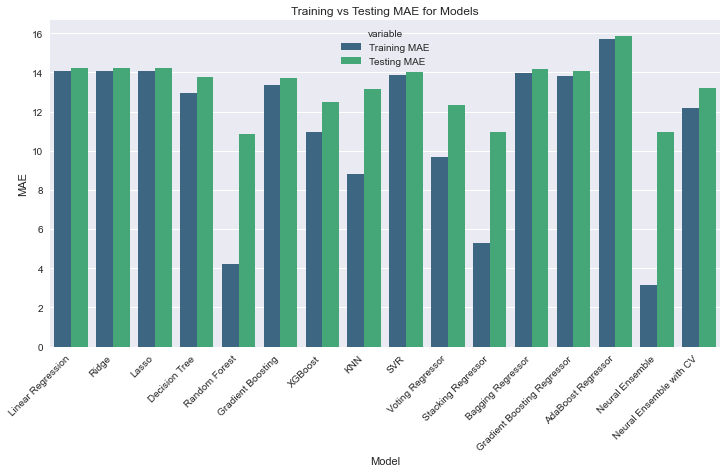

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df.melt(id_vars=["Model"], value_vars=["Training MAE", "Testing MAE"]), 
            x="Model", y="value", hue="variable", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Training vs Testing MAE for Models")
plt.ylabel("MAE")
plt.show()

#### Plotting training vs. testing R2

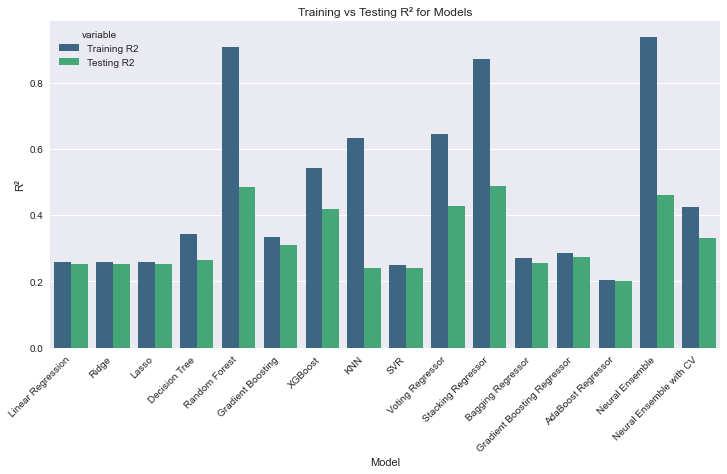

In [41]:
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df.melt(id_vars=["Model"], value_vars=["Training R2", "Testing R2"]), 
            x="Model", y="value", hue="variable", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Training vs Testing R² for Models")
plt.ylabel("R²")
plt.show()

#### Plotting training vs. testing MSE

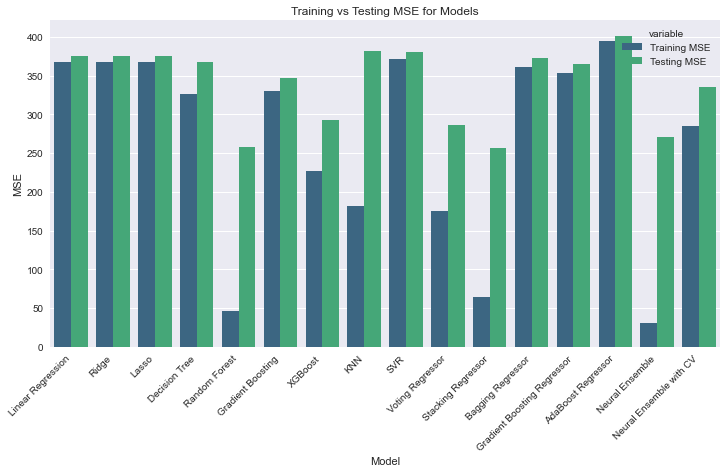

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=result_df.melt(id_vars=["Model"], value_vars=["Training MSE", "Testing MSE"]), 
            x="Model", y="value", hue="variable", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Training vs Testing MSE for Models")
plt.ylabel("MSE")
plt.show()

The visualizations provide the following insights into the model performances:

### **Overfitting**
- **Random Forest** and **Neural Ensemble**:
  - **Training R²** is extremely high (~0.9+), indicating these models fit the training data well.
  - However, their **Testing R²** is significantly lower (~0.45–0.48), showing poor generalization.
  - The gap between training and testing metrics suggests overfitting.

### **Underfitting**
- **AdaBoost Regressor** and **SVR**:
  - Low R² values (~0.2–0.25) for both training and testing indicate poor performance across datasets.
  - High MAE and MSE values suggest these models struggle to capture the complexity of the data.

### **Best Models**
- **Voting Regressor**:
  - Balanced performance with reasonably high **Testing R²** (~0.49 and ~0.43, respectively) and low MAE/MSE values.
  - Minimal gaps between training and testing metrics indicate good generalization without overfitting.

- **Gradient Boosting and XGBoost**:
  - Both show strong testing performance with **Testing R²** values around 0.3–0.41.
  - Errors are moderate, making them competitive candidates.

### **Key Recommendations**
1. **Voting Regressor** is the most promising model, given its high generalization capability.
2. If interpretability is important, **Gradient Boosting** or **XGBoost** could be preferred due to their explainability tools.
3. Overfitting models like **Random Forest** and **Neural Ensemble** can be regularized or tuned further to improve generalization.